In [1]:
import pandas as pd
# For Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

#loading the dataset
df = pd.read_csv("C:/Users/Faraz Yusuf Khan/Desktop/Musa/Kaggle/Tweets/train.csv")


#verifying that the datset is laoded
print("The dataset has been loaded \n:",df.head())

print("Number of rows and columns in the dataset are \n:",df.shape)
df.dropna(inplace=True)

The dataset has been loaded 
:    id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
Number of rows and columns in the dataset are 
: (7613, 5)


In [2]:
# Extracting a sample
df = df.sample(n=200, random_state = 42)
df.reset_index(drop=True, inplace=True)

# Use the str.lower() method to lowercase the 'text' column
df['text'] = df['text'].str.lower()

# Display the modified dataframe
print(df.head(5))

     id     keyword         location  \
0  4852  evacuation     Bend, Oregon   
1  7992       razed         Erie, PA   
2   102    accident    St. Louis, MO   
3  2661       crush  Cleveland, Ohio   
4  6464     injured           Mumbai   

                                                text  target  
0  update: more from bend fd on how a natural gas...       1  
1  today will be another dualcom with @im_razed !...       0  
2  #stlouis #caraccidentlawyer speeding among top...       0  
3  my woman crush wedneday goes to the beautiful ...       0  
4  udhampur terror attack: militants attack polic...       1  


In [3]:
import string

# Removing punctuation from the 'tweet' column
df['text'] = df['text'].apply(lambda x: ''.join(i for i in x if i not in string.punctuation))

# Display the modified dataframe
print(df.head(5))

     id     keyword         location  \
0  4852  evacuation     Bend, Oregon   
1  7992       razed         Erie, PA   
2   102    accident    St. Louis, MO   
3  2661       crush  Cleveland, Ohio   
4  6464     injured           Mumbai   

                                                text  target  
0  update more from bend fd on how a natural gas ...       1  
1  today will be another dualcom with imrazed  if...       0  
2  stlouis caraccidentlawyer speeding among top c...       0  
3  my woman crush wedneday goes to the beautiful ...       0  
4  udhampur terror attack militants attack police...       1  


In [4]:
import nltk
from nltk.corpus import stopwords

# Get list of English stopwords
all_stopwords = set(stopwords.words('english'))

# Removing stopwords from the 'tweet' column
df['tweet_cleaned'] = df['text'].apply(lambda x: " ".join(word for word in x.split() if word.lower() not in all_stopwords))

# Verification step: Display original and cleaned tweets for verification
print("Original Tweet:")
print(df['text'].iloc[0])
print("\nCleaned Tweet:")
print(df['tweet_cleaned'].iloc[0])

Original Tweet:
update more from bend fd on how a natural gas line cut prompted evacuation of the main post office this afternoon httptcowmmkirj0hw

Cleaned Tweet:
update bend fd natural gas line cut prompted evacuation main post office afternoon httptcowmmkirj0hw


In [ ]:
#import nltk
#nltk.download('punkt')  # Download the required NLTK resources

#from textblob import TextBlob

# Apply spell correction to the 'tweet' column
#df['tweet_corrected'] = df['text'].apply(lambda x: str(TextBlob(x).correct()))

# Verification step: Display original and corrected tweets for comparison
#print("Original Tweet:")
#print(df['text'].iloc[0])
#print("\nCorrected Tweet:")
#print(df['tweet_corrected'].iloc[0])

[nltk_data] Downloading package punkt to C:\Users\Faraz Yusuf
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Tokenize the 'text' column
df['tweet_tokenized'] = df['text'].apply(nltk.word_tokenize)

# Verification step: Display tokenized tweets for one entry
print("Original Tweet:")
print(df['text'].iloc[5])
print("\nTokenized Tweet:")
print(df['tweet_tokenized'].iloc[5])

[nltk_data] Downloading package punkt to C:\Users\Faraz Yusuf
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Faraz Yusuf
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Faraz Yusuf
[nltk_data]     Khan\AppData\Roaming\nltk_data...


Original Tweet:
30 seconds for my bitches to evacuate 

Tokenized Tweet:
['30', 'seconds', 'for', 'my', 'bitches', 'to', 'evacuate']


[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
import textblob
from textblob import Word

# Perform lemmatization on the 'text' column
df['tweet_lemmatized'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Verification step: Display original and lemmatized tweets for comparison
print("Original Tweet:")
print(df['text'].iloc[99])
print("\nLemmatized Tweet:")
print(df['tweet_lemmatized'].iloc[99])

Original Tweet:
red flag warning for fire danger amp dry thunderstorms in bay area httptcougzu9iqprw weather cawx by nwsbayarea

Lemmatized Tweet:
red flag warning for fire danger amp dry thunderstorm in bay area httptcougzu9iqprw weather cawx by nwsbayarea


Distinct values in Target column 
: [1 0]


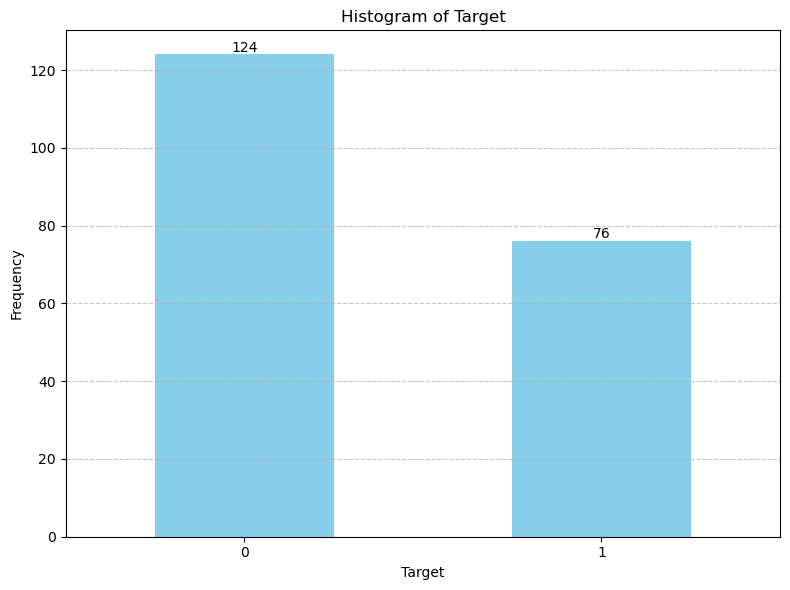

In [7]:
import matplotlib.pyplot as plt

print("Distinct values in Target column \n:",df.target.unique())

# Plotting histogram
plt.figure(figsize=(8, 6))
ax = df['target'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Target')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks(rotation=360)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotating counts on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

   target target_mapped
0       1      disaster
1       0   no disaster
2       0   no disaster
3       0   no disaster
4       1      disaster


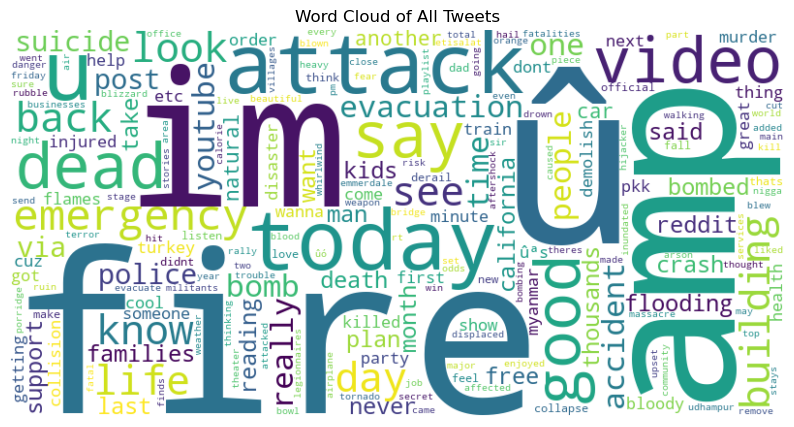

In [8]:
# Define a dictionary to map target values
target_mapping = {1: 'disaster', 0: 'no disaster'}

# Map the target column using the defined dictionary
df['target_mapped'] = df['target'].map(target_mapping)

# Display the modified dataframe to verify the mapping
print(df[['target', 'target_mapped']].head())

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned tweets into a single string for overall word cloud
all_tweets = ' '.join(df['tweet_cleaned'])

# Generate the word cloud for overall tweets
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Plot the word cloud for overall tweets
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud of All Tweets')
plt.axis('off')
plt.show()

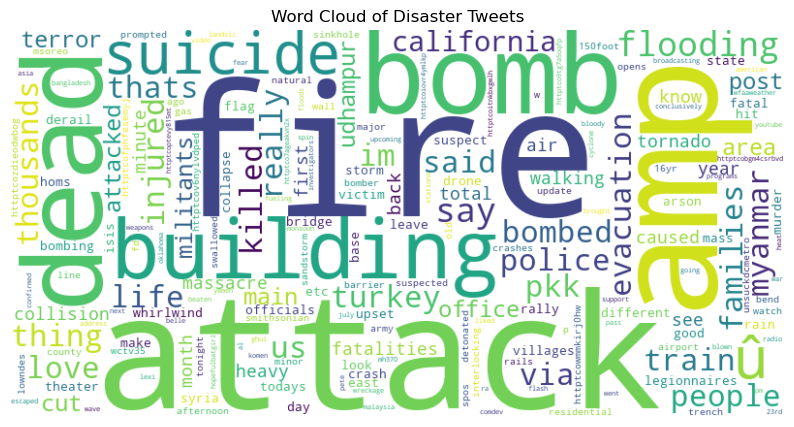

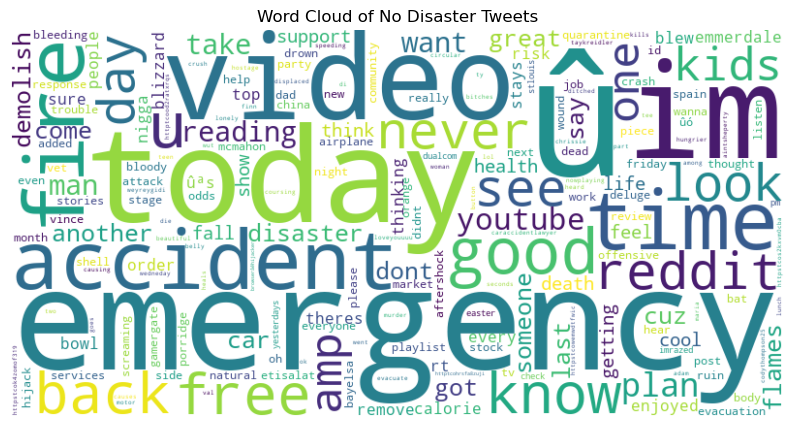

In [9]:
# Filter dataframe for disaster tweets
disaster_tweets = df[df['target'] == 1]
disaster_text = ' '.join(disaster_tweets['tweet_cleaned'])

# Generate the word cloud for disaster tweets
wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate(disaster_text)

# Plot the word cloud for disaster tweets
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title('Word Cloud of Disaster Tweets')
plt.axis('off')
plt.show()

# Filter dataframe for no disaster tweets
no_disaster_tweets = df[df['target'] == 0]
no_disaster_text = ' '.join(no_disaster_tweets['tweet_cleaned'])

# Generate the word cloud for no disaster tweets
wordcloud_no_disaster = WordCloud(width=800, height=400, background_color='white').generate(no_disaster_text)

# Plot the word cloud for no disaster tweets
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_no_disaster, interpolation='bilinear')
plt.title('Word Cloud of No Disaster Tweets')
plt.axis('off')
plt.show()

In [10]:
##################
# CLASSIFICATION #
##################

# Extracting input and output
X = df['text']
y = df['target']

# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# Step 1: defining the classification models
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()
NB = GaussianNB()
LR = LogisticRegression()

# Step 2: training the models
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
LR.fit(X_train,y_train)
NB.fit(X_train.toarray(),y_train)

#Step 3: prediction
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)
y_pred5=LR.predict(X_test)
y_pred6=NB.predict(X_test.toarray())

In [12]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

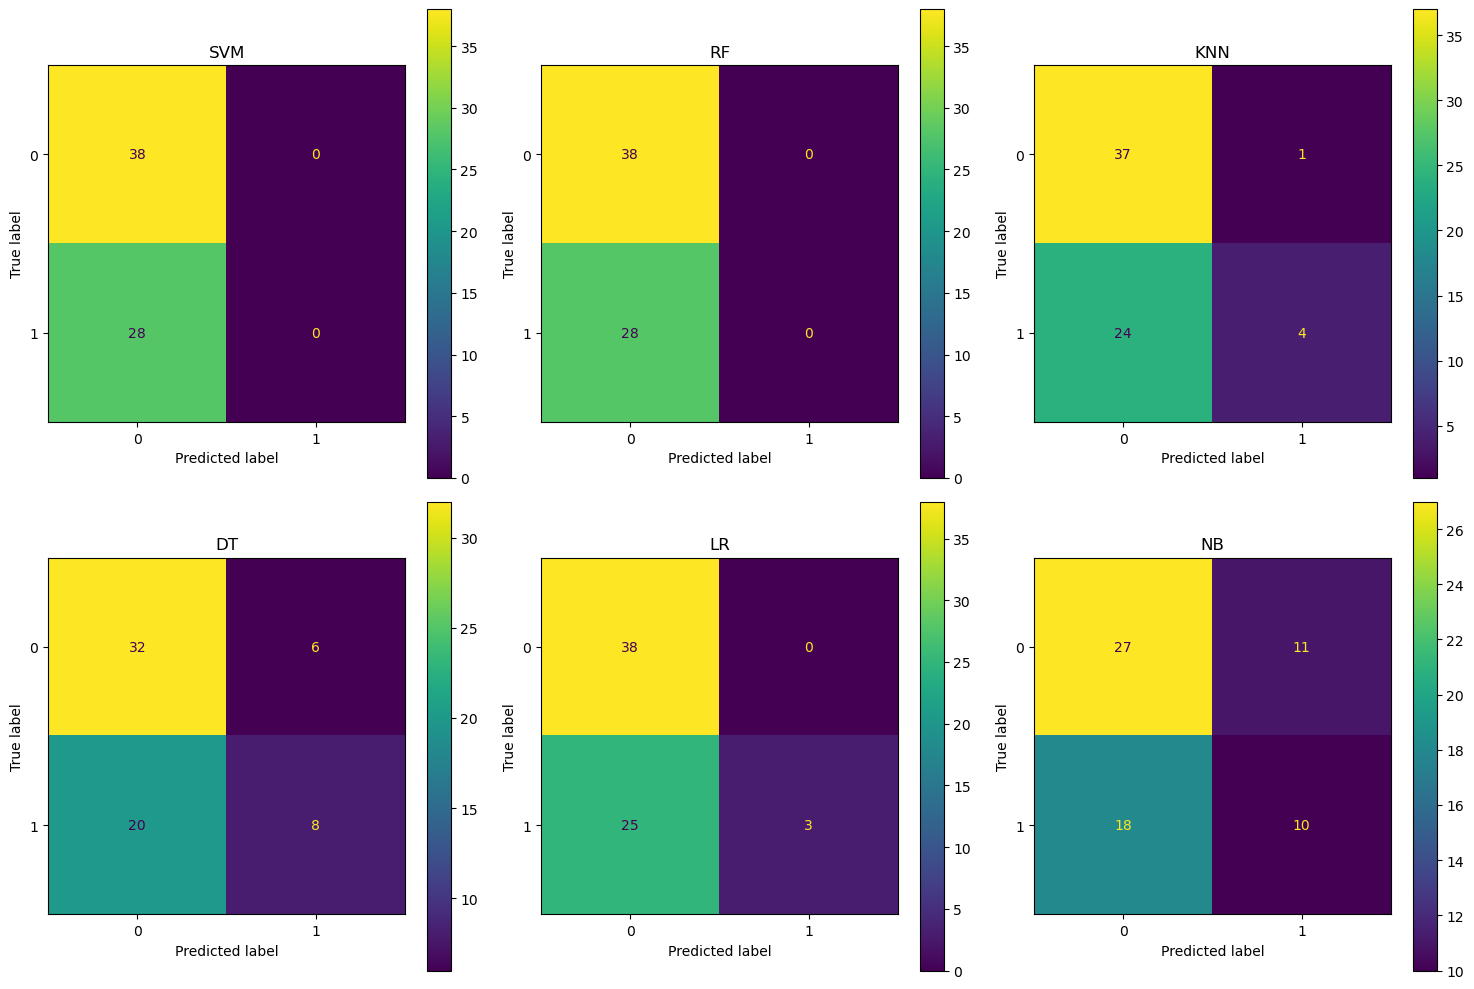

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classifiers = [(SVM, y_pred1, "SVM"), (RF, y_pred2, "RF"), (KNN, y_pred3, "KNN"), (DT, y_pred4, "DT"), (LR, y_pred5, "LR"),
               (NB, y_pred6, "NB")]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for (clf, y_pred, clf_name), ax in zip(classifiers, axes.flatten()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(ax=ax)
    ax.set_title(clf_name)

plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix

# Function to calculate and print confusion metrics
def confusion_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]

    # calculate accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # calculate mis-classification
    misclassification = 1 - accuracy

    # calculate sensitivity
    sensitivity = TP / (TP + FN)

    # calculate specificity
    specificity = TN / (TN + FP)

    # calculate precision
    precision = TP / (TP + FP)

    # calculate f1 score
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    print('Confusion Matrix:')
    print(cm)
    print('-' * 50)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Mis-Classification: {misclassification:.2f}')
    print(f'Sensitivity: {sensitivity:.2f}')
    print(f'Specificity: {specificity:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'F1 Score: {f1_score:.2f}')

# Print confusion metrics for each classifier
print('SVM metrics:')
confusion_metrics(y_test, y_pred1)
print('\n')

print('Random Forest metrics:')
confusion_metrics(y_test, y_pred2)
print('\n')

print('K-Nearest Neighbors metrics:')
confusion_metrics(y_test, y_pred3)
print('\n')

print('Decision Tree metrics:')
confusion_metrics(y_test, y_pred4)
print('\n')

print('Logistic Regression metrics:')
confusion_metrics(y_test, y_pred5)
print('\n')

print('Naive Bayes metrics:')
confusion_metrics(y_test, y_pred6)
print('\n')

SVM metrics:
Confusion Matrix:
[[38  0]
 [28  0]]
--------------------------------------------------
Accuracy: 0.58
Mis-Classification: 0.42
Sensitivity: 0.00
Specificity: 1.00
Precision: nan
F1 Score: nan


Random Forest metrics:
Confusion Matrix:
[[38  0]
 [28  0]]
--------------------------------------------------
Accuracy: 0.58
Mis-Classification: 0.42
Sensitivity: 0.00
Specificity: 1.00
Precision: nan
F1 Score: nan


K-Nearest Neighbors metrics:
Confusion Matrix:
[[37  1]
 [24  4]]
--------------------------------------------------
Accuracy: 0.62
Mis-Classification: 0.38
Sensitivity: 0.14
Specificity: 0.97
Precision: 0.80
F1 Score: 0.24


Decision Tree metrics:
Confusion Matrix:
[[32  6]
 [20  8]]
--------------------------------------------------
Accuracy: 0.61
Mis-Classification: 0.39
Sensitivity: 0.29
Specificity: 0.84
Precision: 0.57
F1 Score: 0.38


Logistic Regression metrics:
Confusion Matrix:
[[38  0]
 [25  3]]
--------------------------------------------------
Accuracy: 0

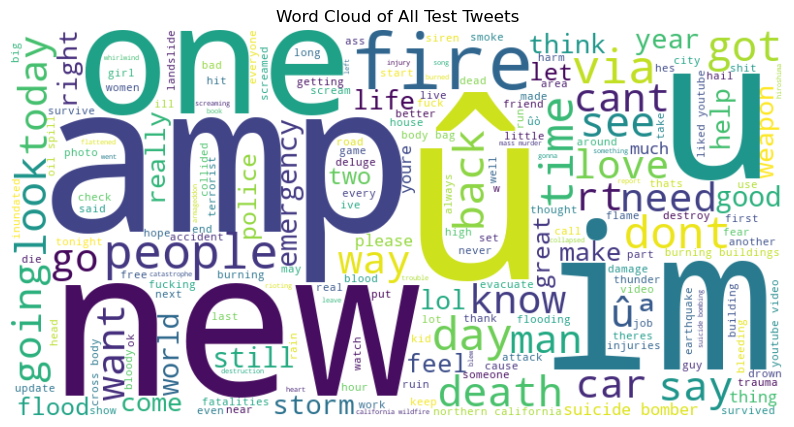

Submission file created successfully!


In [15]:
# Load the test dataset
test_df = pd.read_csv("C:/Users/Faraz Yusuf Khan/Desktop/Musa/Kaggle/Tweets/train.csv")

# Perform preprocessing on the 'text' column
test_df['text'] = test_df['text'].str.lower()

# Removing punctuation from the 'text' column
test_df['text'] = test_df['text'].apply(lambda x: ''.join(i for i in x if i not in string.punctuation))

# Removing stopwords from the 'text' column
test_df['tweet_cleaned'] = test_df['text'].apply(lambda x: " ".join(word for word in x.split() if word.lower() not in all_stopwords))

# Apply spell correction to the 'text' column
#test_df['tweet_corrected'] = test_df['text'].apply(lambda x: str(TextBlob(x).correct()))

# Tokenize the 'text' column
test_df['tweet_tokenized'] = test_df['text'].apply(nltk.word_tokenize)

# Perform lemmatization on the 'text' column
test_df['tweet_lemmatized'] = test_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Generate word clouds for overall, disaster, and no disaster tweets in the test data
all_test_tweets = ' '.join(test_df['tweet_cleaned'])
wordcloud_all_test = WordCloud(width=800, height=400, background_color='white').generate(all_test_tweets)

# Plot the word cloud for overall tweets in the test data
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_all_test, interpolation='bilinear')
plt.title('Word Cloud of All Test Tweets')
plt.axis('off')
plt.show()

# Extract input from the test data
X_test_data = test_df['text']

# Vectorize the test data
X_test_data = vectorizer.transform(X_test_data)

# Make predictions on the test data using the trained models
y_pred_test_SVM = SVM.predict(X_test_data)
y_pred_test_RF = RF.predict(X_test_data)
y_pred_test_KNN = KNN.predict(X_test_data)
y_pred_test_DT = DT.predict(X_test_data)
y_pred_test_LR = LR.predict(X_test_data)
y_pred_test_NB = NB.predict(X_test_data.toarray())


# Assuming y_pred_test_NB contains the predictions of the Naive Bayes classifier on the test data

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': test_df['id'], 'target': y_pred_test_NB})

# Ensure that the DataFrame has exactly 3263 rows
submission_df = submission_df.head(3263)

# Save the submission DataFrame to a CSV file with a header
submission_df.to_csv('submission_NEW.csv', index=False)

print("Submission file created successfully!")